Лабороторна робота номер 2
Частина 1


Обрати унікальний датасет з https://archive.ics.uci.edu/datasets , який відповідає наступним вимогам:
<ul><li>Dataset Characteristics: Multivariate</li>
<li>Attribute Characteristics: Categorical, Integer, Real</li>
<li>Number of Attributes: at least 2 integers/real</li>
<li>Has Missing Values: Yes</li>
</ul>
<br>Можна обрати датасет з інших ресурсів, але з цими ж вимогами.
<br>Побудувати графіки залежності одного integer/real атрибута від іншого (lineplot, scatter etc).
<br>Побудувати гістограму по одному з атрибутів, що буде показувати на кількість елементів, що знаходяться у 5 діапазонах, які ви задасте.
<br>Збудувати графіки, використовуючи приклади, наведені у https://medium.com/data-science/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57 
<br>Побудувати інші графіки, що покажуть корисну інформацію про датасет. Загальна кількість графіків має становити 5-8.

Завантужуємо потрібні бібілотекі

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Заавантажуємо наш датасет Annealing

In [156]:
path_csv = "annealing/anneal.data"
columns = [
    "family", "product_type", "steel", "carbon", "hardness", "temper_rolling",
    "condition", "formability", "strength", "non_ageing", "surface_finish",
    "surface_quality", "enamelability", "bc", "bf", "bt", "bw_me", "bl",
    "m", "chrom", "phos", "cbond", "marvi", "exptl", "ferro", "corr",
    "blue_bright_varn_clean", "lustre", "jurofm", "s", "p", "shape",
    "thick", "width", "len", "oil", "bore", "packing", "classes"
]
stal_data = pd.read_csv(path_csv, names = columns, na_values="?",skipinitialspace=True)
stal_data.head(20)

,family,product_type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non_ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3
5,NaN,C,A,0,45,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,1.600,610.0,0,NaN,0,NaN,3
6,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,0.699,610.0,4880,Y,0,NaN,3
7,NaN,C,A,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,3.300,152.0,0,NaN,0,NaN,3
8,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,0.699,1320.0,0,NaN,0,NaN,3
9,NaN,C,A,0,0,NaN,S,3.0,0,N,...,NaN,NaN,SHEET,1.000,1320.0,762,NaN,0,NaN,3


Оброблюємо дані з датасету

In [157]:
categorical_cols = ["family","product_type","steel","temper_rolling","condition",
                    "formability","non_ageing","surface_finish","surface_quality",
                    "enamelability","bc","bf","bt","bw_me","bl","m","marvi","exptl",
                    "ferro","corr","blue_bright_varn_clean","lustre","jurofm","shape",
                    "oil","bore","packing","classes", "s", "p"]

numeric_cols = ["carbon","hardness","strength","chrom","phos","cbond",
                "thick","width","len"]
stal_data[categorical_cols] = stal_data[categorical_cols].astype("category")
stal_data[numeric_cols] = stal_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

for col in numeric_cols:
    stal_data[col] = stal_data[col].fillna(stal_data[col].median())


for col in categorical_cols:
    stal_data[col] = stal_data[col].cat.add_categories("Unknown").fillna("Unknown")
stal_data.head(20)

c:\Users\Ivan Moroz\Documents\Special-Programming-Sections.-Lab-Work\Special-Programming-Sections.-Lab-Work\Lab_2\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Ivan Moroz\Documents\Special-Programming-Sections.-Lab-Work\Special-Programming-Sections.-Lab-Work\Lab_2\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Ivan Moroz\Documents\Special-Programming-Sections.-Lab-Work\Special-Programming-Sections.-Lab-Work\Lab_2\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,family,product_type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non_ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,Unknown,C,A,8,0,Unknown,S,Unknown,0,Unknown,...,Unknown,Unknown,COIL,0.700,610.0,0,Unknown,0,Unknown,3
1,Unknown,C,R,0,0,Unknown,S,2.0,0,Unknown,...,Unknown,Unknown,COIL,3.200,610.0,0,Unknown,0,Unknown,3
2,Unknown,C,R,0,0,Unknown,S,2.0,0,Unknown,...,Unknown,Unknown,SHEET,0.700,1300.0,762,Unknown,0,Unknown,3
3,Unknown,C,A,0,60,T,Unknown,Unknown,0,Unknown,...,Unknown,Unknown,COIL,2.801,385.1,0,Unknown,0,Unknown,3
4,Unknown,C,A,0,60,T,Unknown,Unknown,0,Unknown,...,Unknown,Unknown,SHEET,0.801,255.0,269,Unknown,0,Unknown,3
5,Unknown,C,A,0,45,Unknown,S,Unknown,0,Unknown,...,Unknown,Unknown,COIL,1.600,610.0,0,Unknown,0,Unknown,3
6,Unknown,C,R,0,0,Unknown,S,2.0,0,Unknown,...,Unknown,Unknown,SHEET,0.699,610.0,4880,Y,0,Unknown,3
7,Unknown,C,A,0,0,Unknown,S,2.0,0,Unknown,...,Unknown,Unknown,COIL,3.300,152.0,0,Unknown,0,Unknown,3
8,Unknown,C,R,0,0,Unknown,S,2.0,0,Unknown,...,Unknown,Unknown,COIL,0.699,1320.0,0,Unknown,0,Unknown,3
9,Unknown,C,A,0,0,Unknown,S,3.0,0,N,...,Unknown,Unknown,SHEET,1.000,1320.0,762,Unknown,0,Unknown,3


Підготовлюємо графіки

In [158]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(40, 40))

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

Графік залежності товщини та ширини, показуючи клас сталі

Text(0.5, 1.0, 'Scatter: Coil vs Sheet')

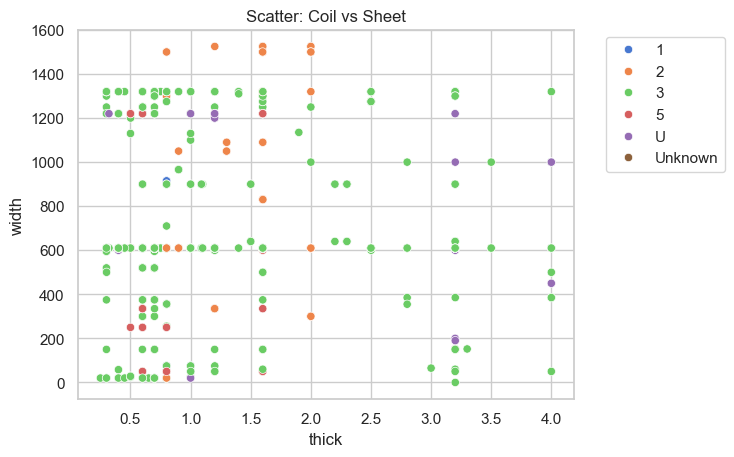

In [159]:
#plt.subplot(2, 3, 1)
sns.scatterplot(data=stal_data, x="thick", y="width", hue="classes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Scatter: Coil vs Sheet")

Графік  средніх значень товщини та ширини

C:\Users\Ivan Moroz\AppData\Local\Temp\ipykernel_4672\562327817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dim = stal_data.groupby("classes")[["thick","width"]].mean().reset_index()


Text(0.5, 1.0, 'lineplot: thick and width')

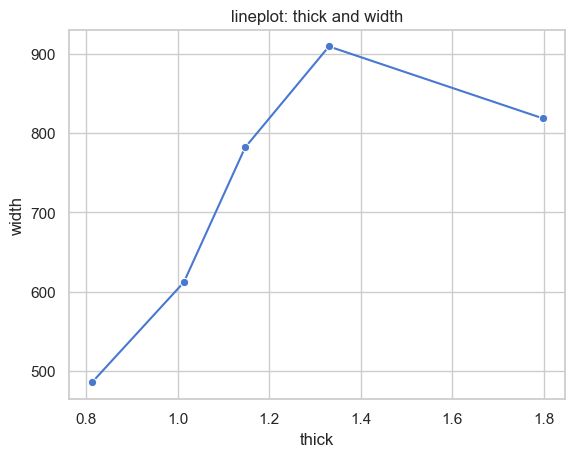

In [165]:

avg_dim = stal_data.groupby("classes")[["thick","width"]].mean().reset_index()
sns.lineplot(data=avg_dim, x="thick", y="width", marker="o")
plt.title("lineplot: thick and width")


Графік кількості твердості та частку кажного класу сталі

<Axes: xlabel='hardness', ylabel='Count'>

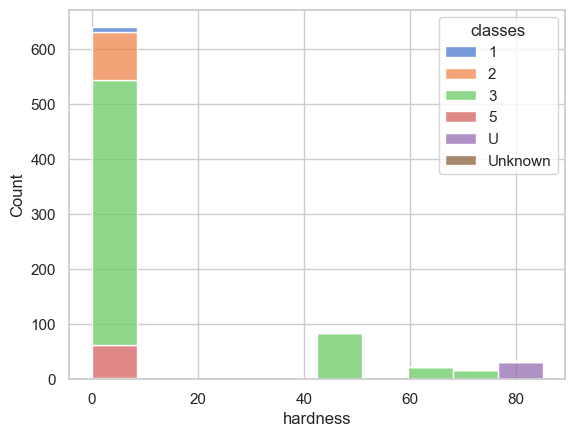

In [ ]:

#bins = [stal_data["hardness"].min()-0.01, 0.2, 0.4, 0.6, 0.8, stal_data["hardness"].max()+0.01]
#sns.histplot(stal_data["hardness"], bins=bins, kde=False, color="skyblue")
min_val = stal_data["hardness"].min()
max_val = stal_data["hardness"].max()
bins = [min_val + i*(max_val-min_val)/5 for i in range(6)]
#sns.histplot(stal_data["hardness"], bins=bins, kde=True, color="cornflowerblue", edgecolor="black")
sns.histplot(data=stal_data, x="hardness", hue="classes", bins=10, multiple="stack")



Графік показує кількості форми сталі, скількі кожного класу сталі

<Axes: xlabel='shape', ylabel='count'>

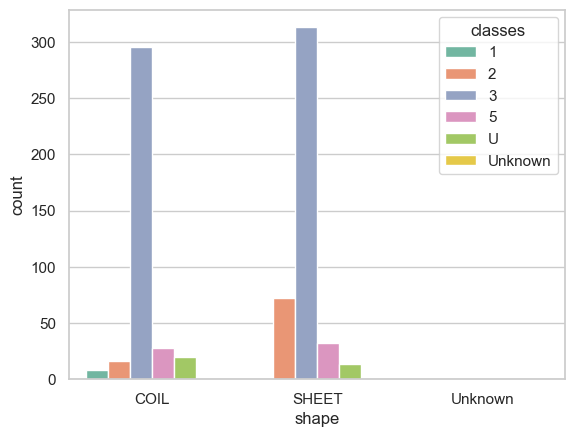

In [162]:

sns.countplot(data=stal_data, x="shape", palette="Set2", hue="classes")


Розподіл кожного класу сталі ао твердості

Text(0.5, 1.0, 'Boxplot: Hardness by Class')

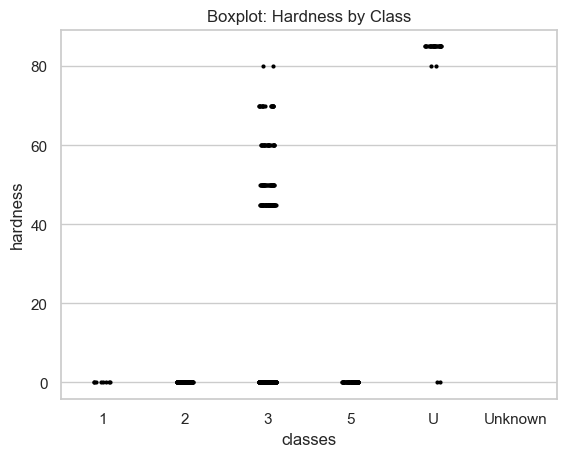

In [ ]:

#sns.stripplot(data=stal_data, x="classes", y="hardness", jitter=True, alpha=0.6)
sns.stripplot(data=stal_data, x="classes", y="hardness",color="black",size=3, jitter=True,  alpha=0.6)
plt.title("Boxplot: Hardness by Class")

З тих даних що мають числові занчені, побудували heatmap. Інформацыя некорисна, бо головний фактор таблиці це клас сталі після обробки, а це нечислове значення

<Axes: >

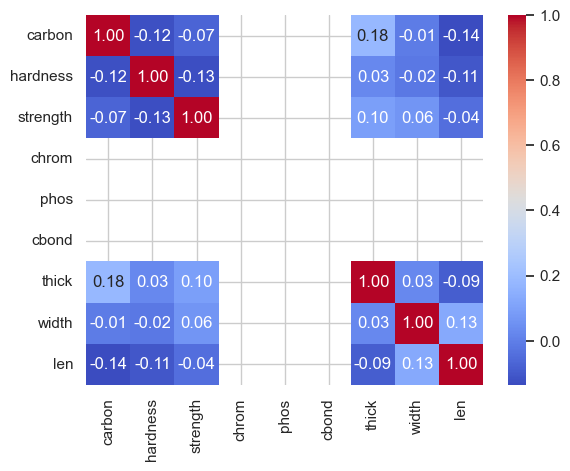

In [164]:

corr = stal_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
